## Predicting Real Estate House Prices

### Building a Linear Regression model for a provided [real estate dataset from Kaggle]("https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction").

#### Import the necessary libraries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

#### Read the csv data into a pandas dataframe

In [3]:
data = pd.read_csv('D:\Real_estate.csv')

data.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### Explore dataset

In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
data.shape

(414, 8)

#### What are the features available in the dataset?

In [100]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

#### Check for missing data

In [6]:
data.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

#### Group all the features as dependent features in X

In [7]:
data.columns = [i.replace(' ','_') for i in data.columns]

X = data.drop('Y_house_price_of_unit_area', axis=1)
X

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


#### Group feature(s) as independent features in y

In [8]:
y = data[['Y_house_price_of_unit_area']].copy()
y

,Y_house_price_of_unit_area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


#### Split the dataset into train and test data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#### Choose the model (Linear Regression)

In [10]:
from sklearn.linear_model import LinearRegression

#### Create an Estimator object

In [11]:
LinearReg = LinearRegression()

#### Train the model

In [12]:
model = LinearReg.fit(X_train, y_train)

#### Apply the model

In [13]:
predictions = model.predict(X_test)
predictions

array([[32.99186909],
       [46.91030331],
       [22.62405373],
       [13.6456238 ],
       [42.0038699 ],
       [32.57702816],
       [30.12711742],
       [43.53798225],
       [37.71458684],
       [14.53000046],
       [12.85198702],
       [38.74008643],
       [31.00312404],
       [43.83418461],
       [50.25381554],
       [34.76450785],
       [42.50316416],
       [44.30740918],
       [30.34768774],
       [43.05592983],
       [50.46214582],
       [28.96760529],
       [39.89786427],
       [46.01967825],
       [45.72399246],
       [28.10109303],
       [31.9157366 ],
       [46.4408888 ],
       [46.41033443],
       [14.87610723],
       [33.29280756],
       [34.40068129],
       [41.06035926],
       [43.09580426],
       [48.06867086],
       [13.92601159],
       [40.76217247],
       [40.7715076 ],
       [37.51178081],
       [14.13370439],
       [40.35238741],
       [24.48045362],
       [53.23549187],
       [35.13503284],
       [33.07941149],
       [37

#### Display the coefficients

In [14]:
model.coef_

array([[-4.15431832e-03,  4.00786710e+00, -2.30222068e-01,
        -4.20874721e-03,  1.18429933e+00,  2.20589799e+02,
        -4.59046240e+00]])

#### Find how well the trained model performed on testing data

In [16]:
#R2 score is used to measure accuracy for Linear Regression models
r2_score = LinearReg.score(X_test, y_test)
print('The model was', round(r2_score*100, 2), '% accurate.')

The model was 54.2 % accurate.


#### Plot House Age Vs Price

<Axes: xlabel='X2_house_age', ylabel='Y_house_price_of_unit_area'>

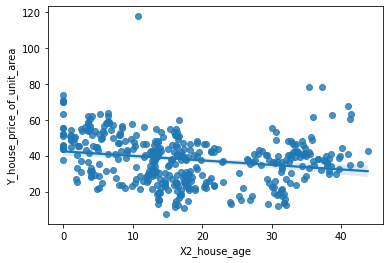

In [17]:
sns.regplot(x='X2_house_age', y='Y_house_price_of_unit_area', data = data)

#### Plot Distance to MRT station Vs Price

<Axes: xlabel='Y_house_price_of_unit_area', ylabel='X3_distance_to_the_nearest_MRT_station'>

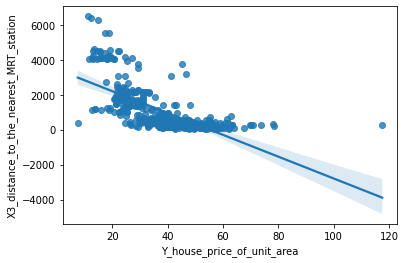

In [18]:
sns.regplot(x='Y_house_price_of_unit_area', y='X3_distance_to_the_nearest_MRT_station', data=data)

#### Plot Number of Convienience Stores Vs Price

<Axes: xlabel='Y_house_price_of_unit_area', ylabel='X4_number_of_convenience_stores'>

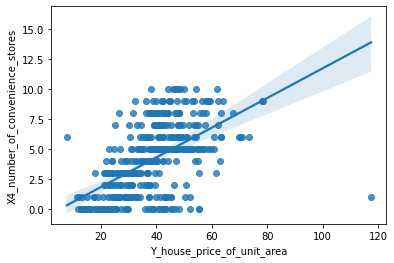

In [19]:
sns.regplot(x='Y_house_price_of_unit_area', y='X4_number_of_convenience_stores', data=data)